In [71]:
import datetime
import ephem
import math
import os
import sys 
import time
import urllib2
import re

In [69]:
Sat_Time = "01:20:23"
TimeNow = datetime.datetime.now() #"10/01/2017"
Longitude = -73.1198 
Latitude = 7.11392
print TimeNow

2017-02-14 16:40:22.192643


In [59]:
longlat = str(Longitude) + "," + str(Latitude)
print longlat
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse(longlat)
print(location.address)

print((location.latitude, location.longitude))
print(location.raw)

-73.1198,7.11392
None
(0.0, 0.0)
{u'error': u'Unable to geocode'}


In [95]:
text = 'GPS BIIR-3  (PRN 11)'
text.partition('(')[1]
print text
text2 = text.rsplit(')', 1)[0]
text3 = text2.rsplit('(', 1)[1]
print text2,"->",text3

GPS BIIR-3  (PRN 11)
GPS BIIR-3  (PRN 11 -> PRN 11


In [98]:
sat_alt, sat_az, sat_name = [], [], []

observer = ephem.Observer()
observer.long = '-73.1224429' # '-37.799423'
observer.lat = '7.1388027' # '144.999979'
observer.date = datetime.datetime.now()

GPS_list = 'http://www.celestrak.com/NORAD/elements/gps-ops.txt'
GPS2_list = 'http://www.tle.info/data/gps-ops.txt'
GLONASS_list = 'http://www.celestrak.com/NORAD/elements/glo-ops.txt'
GLONASS2_list = 'http://www.tle.info/data/glo-ops.txt'
#'http://www.amsat.org/amsat/ftp/keps/current/nasabare.txt').readlines()


tles = urllib2.urlopen(GPS_list).readlines() 

tles = [item.strip() for item in tles]
tles = [(tles[i],tles[i+1],tles[i+2]) for i in xrange(0,len(tles)-2,3)]

for tle in tles:

    try:
        sat = ephem.readtle(tle[0], tle[1], tle[2])
        rt, ra, tt, ta, st, sa = observer.next_pass(sat)

        if rt is not None and st is not None:
            #observer.date = rt
            sat.compute(observer)
            
            #if 'PRN 26' in tle[0]:
                #print "TRUE"
            if TimeNow <= ephem.localtime(st) and TimeNow >= ephem.localtime(rt):
                text = tle[0]
                sat_alt.append(np.rad2deg(sat.alt))
                sat_az.append(np.rad2deg(sat.az))
                
                text2 = text.rsplit(')', 1)[0]
                text3 = text2.rsplit('(', 1)[1]
                sat_name.append(text3)
                print text3, ra, sa
                
               
            #print ' Rise Azimuth: ', ra
            #print ' Transit Time: ', tt
            #print ' Transit Altitude: ', ta
            #print ' Set Time: ', st
            #print ' Set Azimuth: ', sa
            #print 'rise time: ', ephem.localtime(rt)
            #print 'set time: ',  ephem.localtime(st)
            #print
    except ValueError as e:
        print e

PRN 11 220:54:31.6 46:30:41.1
PRN 22 322:25:01.2 40:27:15.1
PRN 23 322:01:36.3 59:16:40.0
PRN 01 297:10:41.9 37:08:57.9
PRN 27 214:45:55.0 38:27:08.1
PRN 09 324:33:23.6 40:25:54.1
PRN 03 323:22:19.5 36:20:21.5
PRN 08 208:14:21.8 58:55:21.6


In [104]:
print sat_name,sat_alt,sat_az

['PRN 11', 'PRN 22', 'PRN 23', 'PRN 01', 'PRN 27', 'PRN 09', 'PRN 03', 'PRN 08'] [-9.6151287946464574, -14.861021435728901, -29.681536434585041, -9.0983438754385997, -2.3071557259168554, -47.216168826571028, -30.501039606676095, -19.197129464271061] [295.83713099254282, 321.00227997053781, 267.34966871922694, 316.78706970539946, 228.64782246669705, 234.2796686072094, 319.59875805837027, 257.22500610495024]


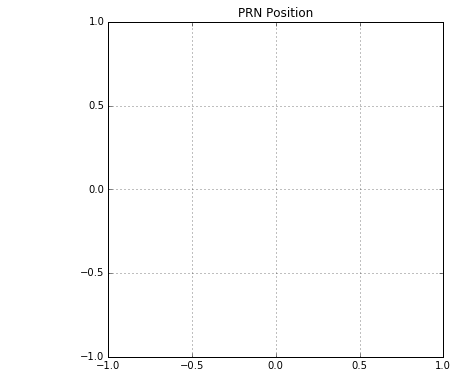

In [103]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
%matplotlib inline
fig =plt.figure(figsize=(6,6))


axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
#plt.subplot(111,projection='polar')
plt.scatter(sat_alt,sat_az)
plt.title('PRN Position')
plt.grid()
for i,txt in enumerate(sat_name):
    #print txt,i
    plt.annotate(txt, (sat_alt[i],sat_az[i]))

In [99]:
# Plot satellite tracks
plt.subplot(211)
plt.plot(sat_alt, sat_az)
plt.ylabel("Altitude (deg)")
plt.xticks(rotation=25)
#plt.subplot(212)
plt.ylabel("Azimuth (deg)")
plt.xticks(rotation=25)
plt.show()

# Plot satellite track in polar coordinates
plt.polar(np.deg2rad(sat_az), 90-np.array(sat_alt))
plt.ylim(0,90)
plt.show()

RuntimeError: Invalid DISPLAY variable